# Homework ada9

### TMI M1 37-176839 Koichiro Tamura

### homework1

ガウスカーネルモデルに対するラプラス正則化最小二乗分類を実装せよ

#### answer

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg,random
from sklearn.base import BaseEstimator
from sklearn import datasets,metrics

In [5]:
class LRRidge(BaseEstimator):
    def __init__(self,alpha=1.,beta=1.,gamma=10.,k=10):
        self.alpha=alpha
        self.beta=beta
        self.gamma=gamma
        self.k=k

    def fit(self,Xl,yl,Xu):
        self.X=np.r_[Xl,Xu]
        #self.X=self.X[random.permutation(len(self.X))]
        self.X2=np.c_[np.sum(self.X**2,1)]
        Xl2=np.c_[np.sum(Xl**2,1)]
        Xu2=np.c_[np.sum(Xu**2,1)]
        Phil=np.exp(-self.gamma*(Xl2+self.X2.T-2*Xl.dot(self.X.T)))
        Phiu=np.exp(-self.gamma*(Xu2+self.X2.T-2*Xu.dot(self.X.T)))

        Phiu2=np.c_[np.sum(Phiu**2,1)]
        d=Phiu2+Phiu2.T-2*Phiu.dot(Phiu.T)
        p=np.c_[np.sort(d,axis=1)[:,self.k+1]]
        W=d<=p
        W=(W+W.T)!=0
        D=np.diag(np.sum(W,axis=1))
        L=D-W
        
        n_features=Phil.shape[1]
        self.theta=linalg.pinv(Phil.T.dot(Phil)+self.alpha*np.identity(n_features)+self.beta*Phiu.T.dot(L).dot(Phiu)).dot(Phil.T).dot(yl)

        return self

    def predict(self,X):
        X2=np.c_[np.sum(X**2,1)]
        Phi=np.exp(-self.gamma*(X2+self.X2.T-2*X.dot(self.X.T)))
        return (Phi.dot(self.theta)>=0)*2-1
    

In [ ]:
N = 500  #サンプル数
X,y =datasets.make_moons(n_samples = N, noise = .05)
y = y*2 - 1   #値を0or1ではなく、-1or1にしている。


Accuracy (LRRidge): 1.0


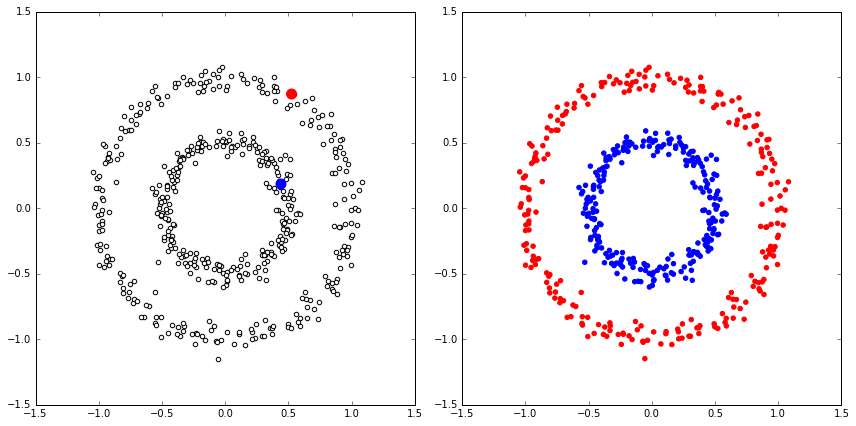

In [50]:
# demo
random.seed(1)
n=500
X,y=datasets.make_circles(n_samples=n,factor=.5,noise=.05)
#X,y=datasets.make_moons(n_samples=n,noise=.05)
y=y*2-1

nl=2 # number of labeled samples
idx=random.permutation(len(X))
il=idx[:nl]; iu=idx[nl:];
Xl=X[il]; Xu=X[iu];
yl=y[il]; yu=y[iu];

clf=LRRidge().fit(Xl,yl,Xu)
ypred=clf.predict(X)
yupred=clf.predict(Xu)

print("Accuracy (LRRidge):",metrics.accuracy_score(yu,yupred))


colors=np.array(["r","b"])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(Xu[:,0],Xu[:,1],c="w",s=20)
plt.scatter(Xl[:,0],Xl[:,1],color=colors[((1+yl)/2).astype(np.int)],s=100)
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],color=colors[((1+ypred)/2).astype(np.int)])
plt.tight_layout()
plt.show()

### homework2

$$D_{E}(p_{test}, q_{\pi}) = 2 \mathbf{E}_{{\mathbf{x}^{'}}\sim  p_{test}\space ,  \mathbf{x} \sim  q_{\pi}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\|  - \mathbf{E}_{{\mathbf{x}^{'}}\space ,  \mathbf{\tilde{x^{'}}} \sim  p_{test}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\| -  \mathbf{E}_{{\mathbf{x}^{'}}\space ,  \mathbf{\tilde{x^{'}}} \sim  q_{\pi}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\| $$

$$q_{\pi}(\mathbf{x}) = \pi p_{train}(\mathbf{x} | y = +1) + (1- \pi)p_{train}(\mathbf{x} | y = -1)$$

エネルギー距離が$\pi$ の関数として次のように表現できることを示せ

$$J(\pi) = (2A_{+1, -1} - A_{+1, +1} - A_{-1, -1}) \pi^{2} - 2(A_{+1, -1} - A_{-1, -1} - b_{+1} + b_{-1}) \pi + Const$$

####  proof):

第1項について

\begin{eqnarray}
2 \mathbf{E}_{{\mathbf{x}^{'}}\sim  p_{test}\space ,  \mathbf{x} \sim  q_{\pi}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\|  
&=& 2\left\{  \pi  \mathbf{E}_{{\mathbf{x}^{'}}\sim  p_{test}\space ,  \mathbf{x} \sim  p_{train \space (x_{i} + 1)}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\| + (1-\pi)  \mathbf{E}_{{\mathbf{x}^{'}}\sim  p_{test}\space ,  \mathbf{x} \sim  p_{train \space (x_{i} - 1)}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\| \right\}  \\
&=& 2(b_{+1} - b_{-1}) \pi + Const
\end{eqnarray}

第2項について, $\pi$の関数ではないので$const$

第3項について
\begin{eqnarray}
- \mathbf{E}_{{\mathbf{x}^{'}}\space ,  \mathbf{\tilde{x^{'}}} \sim  q_{\pi}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\|  
&=& - \left\{  \pi^{2}  \mathbf{E}_{{\mathbf{x}}\sim  p_{train}(x_{i}+1)\space ,  \mathbf{\tilde{x}} \sim  p_{train \space (x_{i} + 1)}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\|   + 2\pi (1- \pi)\mathbf{E}_{{\mathbf{x}}\sim  p_{train}(x_{i}+1)\space ,  \mathbf{\tilde{x}} \sim  p_{train \space (x_{i} - 1)}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\|   (1 - \pi)^{2} \mathbf{E}_{{\mathbf{x}}\sim  p_{train}(x_{i} - 1)\space ,  \mathbf{\tilde{x}} \sim  p_{train \space (x_{i} - 1)}} \left\| \mathbf{x^{'}} - \mathbf{x} \right\| \right\}  \\
&=& (2A_{+1, -1} - A_{+1, +1} - A_{-1, -1}) \pi^{2} - 2(A_{+1, -1} - A_{-1, -1}) \pi + Const
\end{eqnarray}

以上より，
$$J(\pi) = (2A_{+1, -1} - A_{+1, +1} - A_{-1, -1}) \pi^{2} - 2(A_{+1, -1} - A_{-1, -1} - b_{+1} + b_{-1}) \pi + Const$$

<div style="text-align: right;">
【Q.E.D】
</div>

### homework3

線形モデル$f_{\theta}(x) = \mathbf{\theta^{T}x} + \theta_{0}$に対して，クラス比重み付き最小二乗法を実装せよ

#### answer

In [11]:
#dataset
from numpy import random as rnd
train_x = np.r_[rnd.normal(-2,1,(90,1)),rnd.normal(2,1,(10,1))]
train_x = np.c_[train_x,2*rnd.normal(0,1,(100,1))]
train_x = np.c_[train_x,np.ones((100,1))] #畳み込み
train_y = np.r_[np.ones((90,1)),-1*np.ones((10,1))]
test_x = np.r_[rnd.normal(-2,1,(10,1)),rnd.normal(2,1,(90,1))]
test_x = np.c_[test_x,2*rnd.normal(0,1,(100,1))]
test_x = np.c_[test_x,np.ones((100,1))]

In [12]:
w = np.ones((train_y.shape))
w[train_y==1] = 1/9
w[train_y==-1] = 9
W = np.diag(w[:,0])

In [13]:
tmp = np.linalg.inv(np.dot(np.dot(train_x.T,W),train_x))
theta = np.dot(tmp,np.dot(np.dot(train_x.T,W),train_y))
tmp = np.linalg.inv(np.dot(train_x.T,train_x))
theta1 = np.dot(tmp,np.dot(train_x.T,train_y))

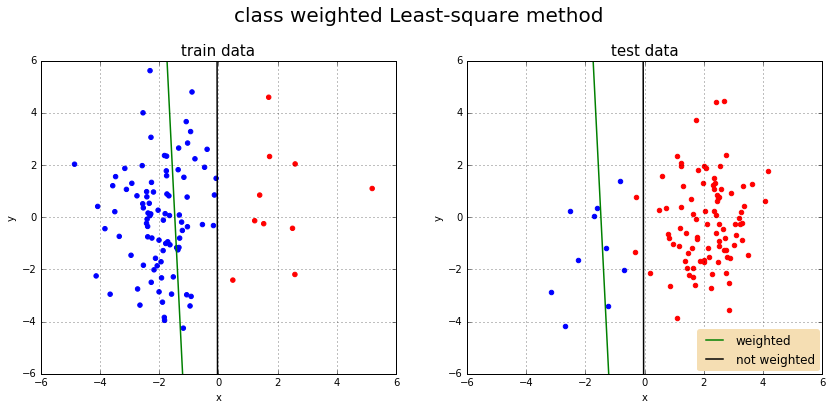

In [14]:
colors = np.array(['r','','b'])
X = np.linspace(-5,5,1000)[:,np.newaxis]

fig = plt.figure(figsize=(14,6))
plt.suptitle(u'class weighted Least-square method',fontsize=20,y=0.975)

fig.add_subplot(1,2,1)
plt.title(u'train data',fontsize=15)
plt.scatter(train_x[:,0],train_x[:,1],color=colors[(train_y[:,0]+1).astype(int)])
plt.plot(X,theta[0]/theta[1]*X+theta[2]/theta[1],'g',linewidth=1.5)
plt.plot(X,theta1[0]/theta1[1]*X+theta[2]/theta[1],'black',linewidth=1.5)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

fig.add_subplot(1,2,2)
plt.title(u'test data',fontsize=15)
plt.scatter(test_x[:10,0],test_x[:10,1],color='b')
plt.scatter(test_x[10:,0],test_x[10:,1],color='r')
plt.plot(X,theta[0]/theta[1]*X+theta[2]/theta[1],'g',linewidth=1.5)
plt.plot(X,theta1[0]/theta1[1]*X+theta[2]/theta[1],'black',linewidth=1.5)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
legend = plt.legend([u'weighted',u'not weighted'],frameon=1,fancybox=True,\
                    bbox_to_anchor=(1.01, -0.01),loc='lower right')
frame = legend.get_frame()
frame.set_facecolor('wheat')
frame.set_edgecolor('None')

plt.subplots_adjust(top=0.85)
fig.savefig('ana9-2.png')

In [15]:
### fin